Berner Fachhochschule BFH - MAS Data Science - Graph Machine Learning - Master Thesis FS/2022 Thomas Iten

# 6. Graph Machine Learning GCN
Das folgende Beispiel zeigt ein GCN (Graph Convolutional Network) gemäß der Definition von Kipf und Welling. Der Graph wird dabei in einen 2-dimensionalen Vektor transformiert mit Hilfe des GCN Modells. Obschon das Modell untrainiert ist, kann man schon erste Gruppierungen erkennen.

Quellen
[1] Kipf, Welling. [Semi-Supervised Classification with Graph Convolutional Networks](https://arxiv.org/abs/1609.02907).
[2] Stamile, Marzullo, Deusebio. Graph Machine Learning. Packt Publishing 2021. ISBN 978-1-80020-449-2



In [32]:
from gml.graph.graph_builder import GraphBuilder
import numpy as np
import networkx as nx
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

np.random.seed(7)

## 6.1 Graph

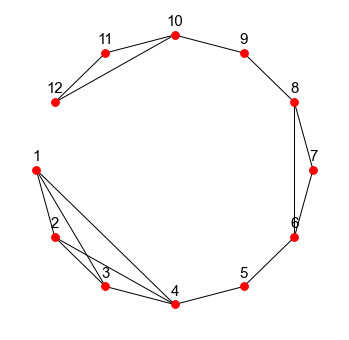

In [39]:
edges = [(1,2),(1,3),(1,4),(2,3),(2,4),(3,4),(4,5),(5,6),(6,7),(6,8),(7,8),(8,9),(9,10),(10,11),(10,12), (11,12)]
graph = GraphBuilder().append_edges(edges).create()
graph.draw()

## 6.2 GCN Layer and Model

In [34]:
class GCNLayer():
    """Graph convolutional network layer with weights and activation function.

    The weights are initialized with glorot initialization (alternatively sampling gaussian or uniform distribution would also work).
    """

    def __init__(self, n_inputs, n_outputs):
        self.W = self.glorot_uniform(n_inputs, n_outputs)
        self.activation = np.tanh

    def glorot_uniform(self, n_inputs, n_outputs):
        """Glorot uniform initializer."""
        sd = np.sqrt(6.0 / (n_inputs + n_outputs))
        return np.random.uniform(-sd, sd, size=(n_outputs, n_inputs))

    def forward(self, A, X):
        self._X = (A @ X).T  # (N,N)*(N,n_outputs) ==> (n_outputs,N)
        H = self.W @ self._X  # (N, D)*(D, n_outputs) => (N, n_outputs)
        H = self.activation(H)
        return H.T  # (n_outputs, N)


class GCNModel():
    """Graph convolutional network model with 3 layers"""

    def __init__(self, n_nodes):
        self.gcn1 = GCNLayer(n_nodes, 8)
        self.gcn2 = GCNLayer(8, 4)
        self.gcn3 = GCNLayer(4, 2)

    def forward(self, A, X):
        H1 = self.gcn1.forward(A_hat, X)
        H2 = self.gcn2.forward(A_hat, H1)
        H3 = self.gcn3.forward(A_hat, H2)
        return H3


## 6.3 Embedding

In [35]:
A = nx.to_numpy_matrix(graph.graph)         # Adjacency matrix
I = np.eye(graph.number_of_nodes())         # Identity matrix, used as node descriptor
A_hat = A + I                               # Adjacency matrix with self-loops

print(A_hat)

[[1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1.]]


In [36]:
D_hat = np.array(np.sum(A_hat, axis=0))[0]  # Degree matrix
D_hat = np.array(np.diag(D_hat))
D_hat = np.linalg.inv(sqrtm(D_hat))

A_norm = D_hat @ A_hat @ D_hat               #

model = GCNModel(graph.number_of_nodes())
embeddings = model.forward(A_norm, I)

print("Embeddings:")
print(embeddings)

Embeddings:
[[-0.99957383  0.99973981]
 [-0.99957383  0.99973981]
 [-0.99957383  0.99973981]
 [-0.99970185  0.99968229]
 [-0.662662    0.40764221]
 [ 0.62850729 -0.66329906]
 [ 0.84139358 -0.55083821]
 [ 0.6802787  -0.13775808]]


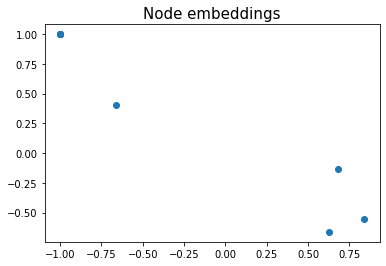

In [37]:
embeddings = np.array(embeddings)

plt.title("Node embeddings", fontsize=15)
plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.show()

---
_The end._